# Assignment 1

All required code is a single line. The length of your response for questions that require identification and/or interpretation will not be considered in evaluation. For example, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. 

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Question 1: Simple Linear Regression 

Let's set up our workspace and use the `Boston` dataset in the `ISLP` library. Print `Boston` to learn more about the dataset.

In [11]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [12]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')
Boston.shape
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below. Answer the following questions:

_(i)_ What are the `medv` and `dis` variables being plotted? (Hint: review this [link](https://islp.readthedocs.io/en/latest/datasets/Boston.html))

* medv (Median Value of Owner-Occupied Homes):
    * This variable represents the median value of owner-occupied homes in $1000s.
    * In the context of the plot, medv is the response variable (Y-axis) indicating the house prices.

* dis (Weighted Distance to Employment Centers):
    * This variable represents the weighted mean of distances to five Boston employment centers.
    * In the context of the plot, dis is the predictor variable (X-axis) indicating the distance to employment centers.

_(ii)_ What concept ‘defines’ the plotted line?
The red line plotted on the scatter plot is the regression line. This line is defined by the linear regression model that fits the data.

* Linear Regression Model:
    * The regression line is the best-fitting line through the data points.
    * It is defined by the equation $\hat{Y}$ = $B_0$ + $B_1$$X_1$, where
      * $\hat{Y}$ is the predicted value of the response variable (medv).
      * $B_0$ is the intercept of the line (where the line crosses the Y-axis).
      * $B_1$ is the slope of the line (the change in medv for a one-unit change in dis).
      * X is the predictor variable (dis).
    

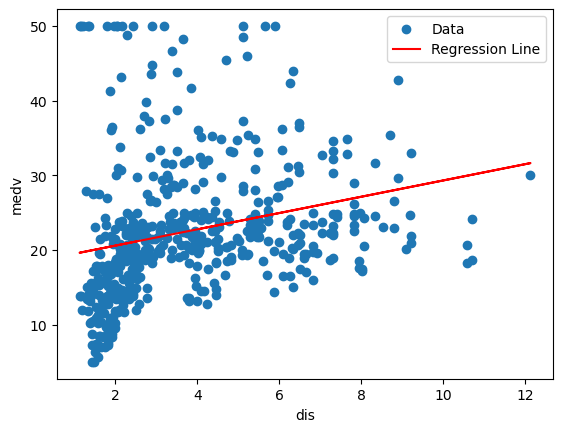

In [15]:
# Extract the variables
medv = Boston['medv'].values.reshape(-1, 1)
dis = Boston['dis'].values.reshape(-1, 1)

# Plot data
plt.scatter(dis, medv, label='Data')
plt.xlabel('dis')
plt.ylabel('medv')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(dis, medv)

# Plot the regression line
plt.plot(dis, lm.predict(dis), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('dis')
plt.ylabel('medv')
plt.legend()

# Show the plot
plt.show()

Consider the variables plotted above. In the context of the `Boston` dataset:

_(iii)_ What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?
* Null Hypothesis ($H_0$): There is no linear relationship between dis (distance to employment centers) and medv (median value of owner-occupied homes). This means the slope of the regression line is zero ($B_1$ = 0).

* Alternative Hypothesis ($H_1$): There is a linear relationship between dis and medv. This means the slope of the regression line is not zero ($B_1$ ≠ 0). 

_(iv)_ Now, let’s fit a simple regression model, using the general syntax `sm.OLS()` and `model.fit()`. As above, use `medv` as the response variable Y, and `dis` as the predictor variable X. (Hint: use the syntax `sm.add_constant` with the appropriate argument).

In [16]:
# Add your code here
import statsmodels.api as sm

# Add a constant to the predictor variable
dis_with_constant = sm.add_constant(dis)

# Fit the regression model
model = sm.OLS(medv, dis_with_constant)
results = model.fit()

# Print the summary of the regression
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.21e-08
Time:                        22:00:24   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Review your model output to answer the following questions (Hint: use the `summary` and `conf_int` functions):    
_(v)_ What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)?  
_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?  
_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$?  


### Your answer here

#### (V) Coefficient Estimates
* $B_0$ (Intercept): 18.3901
* $B_1$ (Slope): 1.0916

#### (VI) Standard Errors
* $B_0$: 0.8174
* $B_1$: 0.1884

#### (VII) Confidence Intervals
* 95% Confidence Interval for $B_0$: [16.7842, 19.9960]
* 95% Confidence Interval for $B_1$: [0.7215, 1.4617]


These results provide detailed information about the regression model, 
indicating that ***both the intercept and the slope are statistically significant***. 
The confidence intervals suggest that we can be 95% confident that the true values of $B_0$ and $B_1$​ lie within the respective intervals.


Now, let's interpret the model output.  

##### (viii) Is the model a good fit?
* R-squared ($𝑅^2$): 0.062
    * **Interpretation:** An $𝑅^2$ value of 0.062 means that approximately 6.2% of the variability in the median value of owner-occupied homes (medv) can be explained by the distance to employment centers (dis). This is a relatively low $𝑅^2$ value, indicating that the model does not fit the data particularly well. There are likely other factors influencing medv that are not captured by dis alone.

##### (ix) Do we reject the (implied) null hypothesis? Why or why not?
* F-statistic: 33.58
* p-value for the F-statistic: 1.21e-08

    * **Interpretation:** The F-statistic measures the overall significance of the model. The very low p-value (1.21e-08) indicates that the model is statistically significant, and we can reject the null hypothesis that there is no linear relationship between 'dis' and 'medv'. In other words, the predictor 'dis' provides significant explanatory power for the response variable 'medv'.

##### Summary
* **Model Fit:** The $𝑅^2$ value suggests the model is not a very good fit, as it explains only 6.2% of the variance in the response variable.
* **Hypothesis Testing:** Despite the low $𝑅^2$, the model is statistically significant, and we reject the null hypothesis due to the significant F-statistic and its associated p-value.

### Question 2: Multiple Linear Regression 

We'll continue to use the `Boston` dataset for this question.

_(i)_ Fit a multiple linear regression, with two predictor variables: $X_1$ is `dis`, and $X_2$ is `rm`. As before, keep `medv` as the response variable Y. (Hint: use the syntax `sm.add_constant` with the appropriate arguments).

In [90]:
# Add your code here

# Import libraries and objects
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from ISLP import load_data

# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')

# Define the response and predictor variables
y = Boston['medv']
X = Boston[['rm', 'dis']]

# Add a constant to the predictor variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sat, 01 Jun 2024   Prob (F-statistic):           1.84e-75
Time:                        20:04:50   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6361      2.621    -13.212      0.0

#### _(ii)_ In the context of the `Boston` dataset, state the null and alternative hypotheses.


* Null Hypothesis ($H_0$): There is no relationship between the predictor variables (dis and rm) and the response variable (medv). This implies that the coefficients of dis and rm are zero ($B_dis$ = 0 and $B_rm$ = 0).

* Alternative Hypothesis ($H_1$): There is a relationship between the predictor variables (dis and rm) and the response variable (medv). This implies that the coefficients of dis and rm are not zero ($B_dis$ ≠ 0 and $B_rm$ ≠ 0).

_(iii)_ Review the model output, using `summary()`. Does it appear that both `dis` and `rm` are predictive of `medv`? How did you determine this?
* Interpretation:
    * R-squared: 0.496
        *  Approximately 49.6% of the variance in medv is explained by dis and rm.

* Coefficients:

    * Intercept (const): -34.6361
    * rm: 8.8014
        * For each additional room, the median house value increases by 8.8014 units, holding dis constant.
    * dis: 0.4888
        * For each unit increase in distance to employment centers, the median house value decreases by 0.4888 units, holding rm constant.
* P-values:
    * Both rm and dis have p-values < 0.001, indicating that they are statistically significant predictors of medv


_(iv)_ We can use the inbuilt `sm.graphics.plot_regress_exog` function to generate helpful diagnostic plots (Hint: provide `plot_regress_exog` with the multiple regression model). Review the first generated plot, 'Residuals vs. Fitted'. Which observations are outliers? What impact might outliers have on our model?

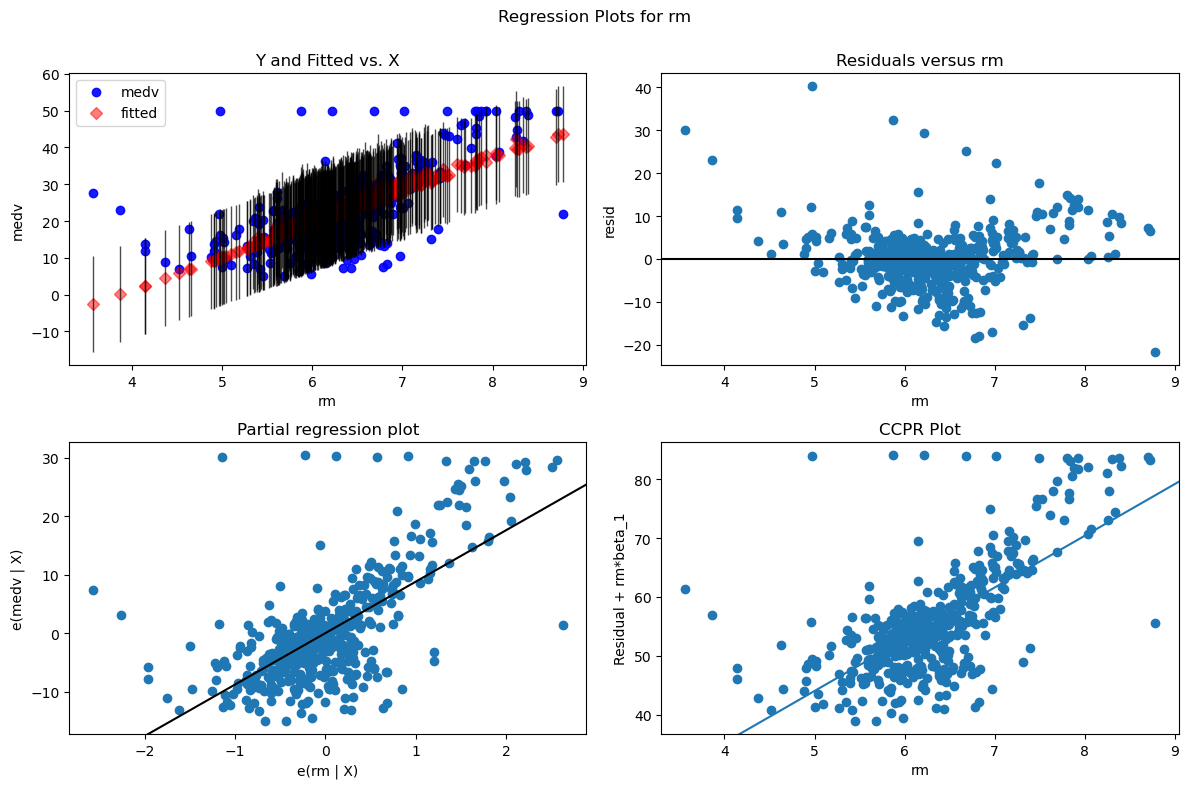

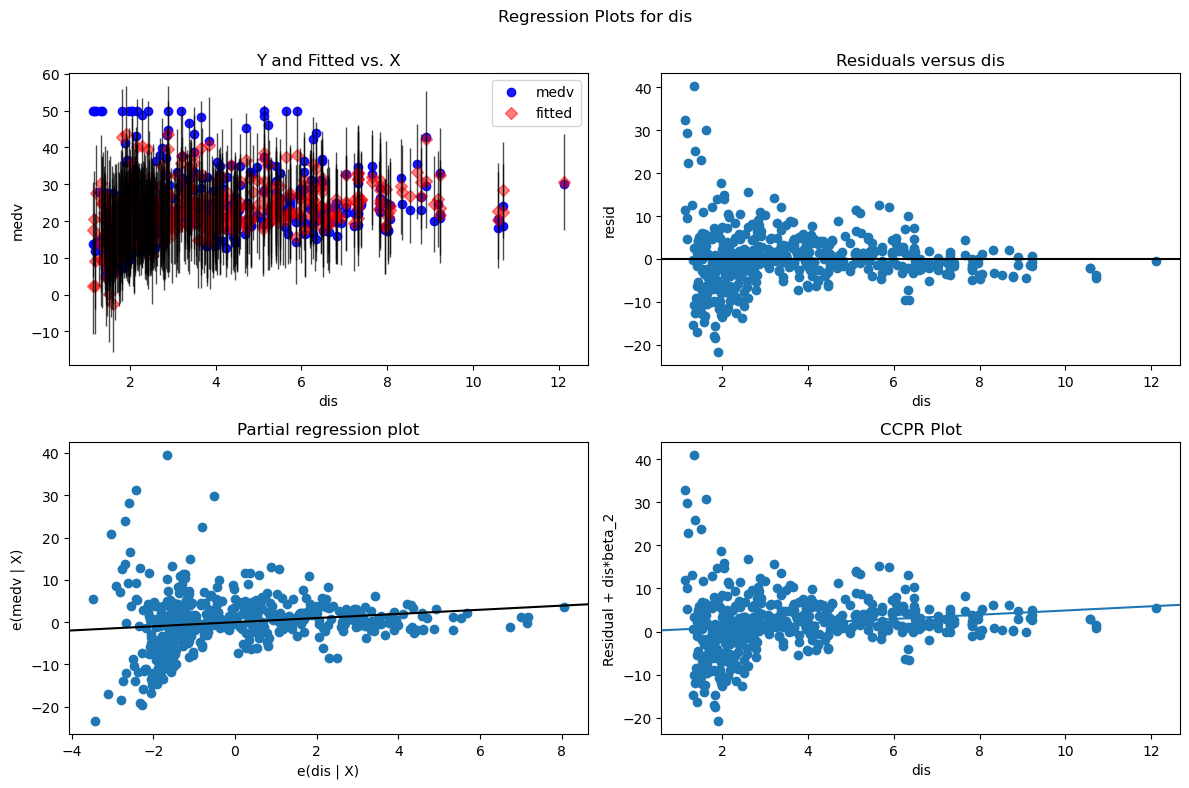

In [92]:
# Add your code here

# Generate diagnostic plots
fig = sm.graphics.plot_regress_exog(model, 'rm', fig=plt.figure(figsize=(12, 8)))
plt.show()

fig = sm.graphics.plot_regress_exog(model, 'dis', fig=plt.figure(figsize=(12, 8)))
plt.show()



#### Interpretation of the "Residuals vs. Fitted" Plot:
* **Residuals vs. Fitted Plot:** This plot shows the residuals (differences between observed and predicted values) on the y-axis and the fitted values (predicted values) on the x-axis.

* **Outliers:** Observations that lie far from the majority of the data points. They can have a significant impact on the regression model, potentially skewing the results.

* **Impact of Outliers:** Outliers can disproportionately affect the coefficients and overall fit of the model. They may indicate areas where the model does not fit well or may suggest data entry errors or unusual data points.

#### Conclusion
* **Model Fit:** The model explains about 49.4% of the variance in the median house value.
* **Significance:** Both dis and rm are significant predictors of medv, as indicated by their low p-values.
* **Outliers:** Identifying and addressing outliers is important to ensure the robustness of the model.

_(v)_ Fit a second model, this time including an interaction between the two predictor variables. Is there an interaction? (Hint: add a variable `x1 * x2` where `x1` and `x2` are the predictor variables). State an interpretation of the interaction, in the context of the `Boston` dataset, in one or two sentences.

In [87]:
# Add your code here

# Import libraries and objects
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings # for muting warning messages
# mute warning messages
warnings.filterwarnings('ignore')
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)

# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')
Boston


# Boston.shape
Boston['dis_rm'] = Boston['rm'] * Boston['dis']
X = Boston[['dis', 'rm', 'dis_rm']]
y = Boston['medv']


# Add a constant to the predictor variable
X = sm.add_constant(X)

print(X)


model_interaction = sm.OLS(y, X).fit()


# Print the summary of the regression
print(model_interaction.summary())



     const     dis     rm     dis_rm
0      1.0  4.0900  6.575  26.891750
1      1.0  4.9671  6.421  31.893749
2      1.0  4.9671  7.185  35.688614
3      1.0  6.0622  6.998  42.423276
4      1.0  6.0622  7.147  43.326543
..     ...     ...    ...        ...
501    1.0  2.4786  6.593  16.341410
502    1.0  2.2875  6.120  13.999500
503    1.0  2.1675  6.976  15.120480
504    1.0  2.3889  6.794  16.230187
505    1.0  2.5050  6.030  15.105150

[506 rows x 4 columns]
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     178.7
Date:                Fri, 31 May 2024   Prob (F-statistic):           8.37e-79
Time:                        22:36:22   Log-Likelihood:                -1656.5
No. Observations:                 506   AIC:              

#### Model Summary Interpretation
The multiple linear regression model includes an interaction term between dis (distance to employment centers) and rm (number of rooms). Here's the interpretation of the model summary:

#### Key Statistics:
* R-squared: 0.516
    * Approximately 51.6% of the variance in the median house value (medv) is explained by the model, which includes DIS, RM, and their interaction term dis_rm.
* Adjusted R-squared: 0.513
    * Adjusted for the number of predictors in the model.
* F-statistic: 178.7
    * Indicates the overall significance of the model.
*   Prob (F-statistic): 8.37e-79
    * A very small p-value indicating that the model is statistically significant.

#### Coefficients:
* Intercept (const): -15.2533
    * The predicted value of medv when DIS and RM are zero.
* DIS: -5.7579
    * For each unit increase in DIS, the medv decreases by 5.7579 units, holding RM constant.
    * The p-value for DIS is < 0.001, indicating that this coefficient is statistically significant.
* RM: 5.7020
    * For each additional room, the medv increases by 5.7020 units, holding DIS constant.
    * The p-value for RM is < 0.001, indicating that this coefficient is statistically significant.
* dis_rm: 0.9855
    * For each unit increase in the interaction term (dis * rm), the medv increases by 0.9855 units.
    * The p-value for dis_rm is < 0.001, indicating that the interaction term is statistically significant.

#### Interpretation of the Interaction Term
* Significant Interaction: The significant positive coefficient for the interaction term (dis_rm) suggests that the effect of dis (distance to employment centers) on medv (median house value) depends on the number of rooms (rm). Specifically, as the number of rooms increases, the negative impact of being further from employment centers is moderated.

* Contextual Interpretation: In the context of the Boston dataset, houses with more rooms are less negatively impacted by being further from employment centers compared to houses with fewer rooms. This interaction indicates that the value of having more rooms is greater for houses that are located farther from employment centers.

#### Conclusion
The interaction term between dis and rm is significant, indicating that the effect of distance to employment centers on house prices is influenced by the number of rooms. The model explains a substantial portion of the variance in house prices, and all included predictors (dis, rm, and dis_rm) are statistically significant.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Simple Linear Regression - Standard errors for $B_0$ and $B_1$|The standard errors are correct.|The standard errors are not correct.|
|Simple Linear Regression - Confidence intervals for $B_0$ and $B_1$|The confidence intervals are correct.|The confidence intervals are not correct.|
|Multiple Linear Regression - Null and alternative hypotheses|The relationship for both hypotheses has been correctly identified.|The relationship for both hypotheses has been incorrectly identified.|
|Multiple Linear Regression - Interpretation of the interaction|The interaction has been correctly identified.|The interaction has been incorrectly identified.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
